In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.4 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Pride and Prejudice - Jane Austen.txt to Pride and Prejudice - Jane Austen.txt


PreProcess

In [3]:
import random
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import contractions

# Ensure the required resources are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')


# Preprocessing function
def preprocess_text(text):
    # Remove unnecessary symbols
    text = re.sub(r'[\*\(\)\[\]{}]', '', text)  # Remove *, (, ), [, ], {, }
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize spaces

    text = text.lower()
    text = contractions.fix(text)  # Expand contractions

    # Remove Project Gutenberg boilerplate and metadata
    text = re.sub(r'\*\*\*.*?\*\*\*', '', text, flags=re.DOTALL)  # Remove START/END OF GUTENBERG EBOOK
    text = re.sub(r'(title|author|release date|language|e-text|prepared by)[^:]*:.*?(\n|$)', '', text)
    text = re.sub(r'(project gutenberg license).*?(\n|$)', '', text, flags=re.DOTALL)

    # Replace patterns with contextual tags
    text = re.sub(r'http\S+|www\S+|ftp\S+', '<URL>', text)  # URLs
    text = re.sub(r'\b(\d{1,2}[:.]\d{2}\s?[ap][m]|\b(?:[a-z]+ \d{1,2},? \d{4})\b)', '<TIME>',text)  # Times and dates
    text = re.sub(r'\d+%', '<PERCENT>', text)  # Percentages
    text = re.sub(r'\d+\s?(?:years?|yrs?)\s?old', '<AGE>', text)  # Ages
    text = re.sub(r'@\w+', '<USER_MENTION>', text)  # Mentions
    text = re.sub(r'#\w+', '<TOPIC_HASHTAG>', text)  # Hashtags

    # Handle ordinals and superscripts
    text = re.sub(r'(\d+\^?(?:st|nd|rd|th))', '<ORDINAL>', text)  # Ordinals like 1^st, 2^nd
    text = re.sub(r'(\d\^st|\d\^nd|\d\^rd|\d\^th)', '<ORDINAL>', text)  # Handle other ordinals

    # Handle possessives
    text = re.sub(r'\d+', '<NUM>', text)  # Replace numbers with <NUM> token
    text = re.sub(r"\b([a-z]+['’][sS]?)\b", r'\1', text)

    # Handle dates and times
    text = re.sub(r'\b(\d{1,2} \w+ \d{4})\b', '<DATE>', text)  # Format like 01 January 1813
    text = re.sub(r'\b(\d{1,2}[:.]\d{2} [ap][m])\b', '<TIME>', text)  # Format like 12:30 PM

    text = re.sub(r'chapter\s+[ivxlcdm]+\.', '', text)

    text = contractions.fix(text)  # Expand contractions

    text = re.sub(r'[^a-z0-9\s<>]', '', text)  # Keep only alphanumeric and relevant symbols

    return text

def load_and_split_data(sentences, test_size=1000, val_size=2000):
    random.shuffle(sentences)
    test_sentences = sentences[:test_size]
    val_sentences = sentences[test_size:test_size + val_size]
    train_sentences = sentences[test_size + val_size:]
    return train_sentences, val_sentences, test_sentences


# Tokenization function
def tokenize_text(text, test_size=1000, val_size=2000,split = False):

    # Tokenize sentences using NLTK's sent_tokenize to split into sentences
    sentences = sent_tokenize(text)
    if split:
        train_sentences,val_sentences, test_sentences = load_and_split_data(sentences, test_size=1000,val_size=2000)
    else:
        train_sentences = sentences
        val_size = []
        test_sentences = []


    train_tokenized_sentences = []

    for sentence in train_sentences:
        # Preprocess text
        sentence = preprocess_text(sentence)

        # Tokenize each sentence into words
        words = sentence.split()

        train_tokenized_sentences.append(words)

    test_tokenized_sentences = []

    for sentence in test_sentences:
        # Preprocess text
        sentence = preprocess_text(sentence)

        # Tokenize each sentence into words
        words = sentence.split()

        test_tokenized_sentences.append(words)

    val_tokenized_sentences = []

    for sentence in val_sentences:
        # Preprocess text
        sentence = preprocess_text(sentence)

        # Tokenize each sentence into words
        words = sentence.split()

        val_tokenized_sentences.append(words)

    return train_tokenized_sentences,val_tokenized_sentences,test_tokenized_sentences


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# N=3

Epoch 1, Training Perplexity: 557.7430
Epoch 1, Validation Perplexity: 588.7394
Epoch 2, Training Perplexity: 499.6859
Epoch 2, Validation Perplexity: 533.3008
Epoch 3, Training Perplexity: 445.0512
Epoch 3, Validation Perplexity: 486.2288
Epoch 4, Training Perplexity: 402.8711
Epoch 4, Validation Perplexity: 449.5917
Epoch 5, Training Perplexity: 354.4553
Epoch 5, Validation Perplexity: 404.3210
Epoch 6, Training Perplexity: 327.7942
Epoch 6, Validation Perplexity: 380.4904
Epoch 7, Training Perplexity: 312.6389
Epoch 7, Validation Perplexity: 367.5470
Epoch 8, Training Perplexity: 298.0317
Epoch 8, Validation Perplexity: 354.2325
Epoch 9, Training Perplexity: 285.9232
Epoch 9, Validation Perplexity: 343.6819
Epoch 10, Training Perplexity: 276.4323
Epoch 10, Validation Perplexity: 334.2095
Epoch 11, Training Perplexity: 267.3709
Epoch 11, Validation Perplexity: 326.4752
Epoch 12, Training Perplexity: 262.8744
Epoch 12, Validation Perplexity: 323.1727
Epoch 13, Training Perplexity: 258

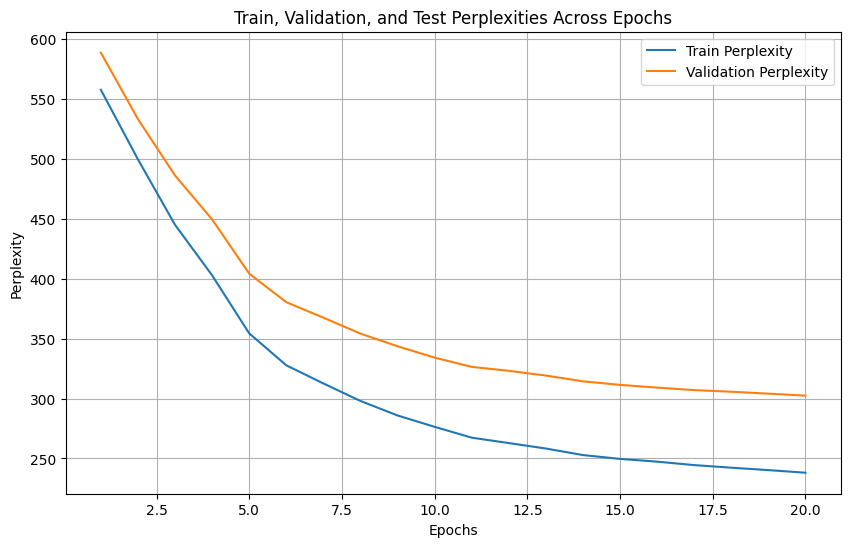

<ipython-input-4-e000d648ebf7>:180: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('ffnn_3_bestpp.pt', map_location=device)


Train Perplexity: 238.1165
Validation Perplexity: 302.4858
Test Perplexity: 297.3408


In [4]:
#Run

import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import os
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class FFNNLanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=512, hidden_dims=[128, 128, 128], n_gram=3, dropout_rate=0.6):
        super(FFNNLanguageModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * (n_gram - 1), hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.fc4 = nn.Linear(hidden_dims[2], vocab_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        embedded = self.embedding(x).view(x.shape[0], -1)
        hidden = self.relu(self.fc1(embedded))
        hidden = self.dropout(hidden)
        hidden = self.relu(self.fc2(hidden))
        hidden = self.dropout(hidden)
        hidden = self.relu(self.fc3(hidden))
        hidden = self.dropout(hidden)
        output = self.fc4(hidden)
        return output

def train_ffnn(train_sentences, val_sentences, vocab, n=3, epochs=20, lr=0.0005, batch_size=128, corpus_path="sample.txt"):
    vocab_size = len(vocab)
    word_to_index = {word: i for i, word in enumerate(vocab)}

    train_data = preprocess_data(train_sentences, n)
    val_data = preprocess_data(val_sentences, n)

    model = FFNNLanguageModel(vocab_size, n_gram=n).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-3)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    patience = 2
    best_val_perplexity = float('inf')
    epochs_without_improvement = 0

    # Store perplexities for plotting
    train_perplexities = []
    val_perplexities = []
    test_perplexities = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        random.shuffle(train_data)

        for i in range(0, len(train_data), batch_size):
            batch = train_data[i:i + batch_size]
            contexts, targets = zip(*batch)

            contexts = [[word if word in word_to_index else "<UNK>" for word in context] for context in contexts]
            targets = [target if target in word_to_index else "<UNK>" for target in targets]

            context_idxs = torch.tensor([[word_to_index[word] for word in context] for context in contexts], dtype=torch.long).to(device)
            target_idxs = torch.tensor([word_to_index[target] for target in targets], dtype=torch.long).to(device)

            optimizer.zero_grad()
            output = model(context_idxs)
            loss = criterion(output, target_idxs)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Calculate perplexities for this epoch
        train_perplexity = calculate_perplexity(model, train_data, word_to_index, criterion, n, batch_size)
        val_perplexity = calculate_perplexity(model, val_data, word_to_index, criterion, n, batch_size)
        # test_perplexity = calculate_perplexity(model, test_data, word_to_index, criterion, n, batch_size)

        # Append the perplexities for plotting
        train_perplexities.append(train_perplexity)
        val_perplexities.append(val_perplexity)
        # test_perplexities.append(test_perplexity)

        print(f"Epoch {epoch + 1}, Training Perplexity: {train_perplexity:.4f}")
        print(f"Epoch {epoch + 1}, Validation Perplexity: {val_perplexity:.4f}")
        # print(f"Epoch {epoch + 1}, Test Perplexity: {test_perplexity:.4f}")

        if val_perplexity < best_val_perplexity:
            best_val_perplexity = val_perplexity
            epochs_without_improvement = 0
            # Save model with filename 'ffnn_3_bestpp.pt'
            torch.save({
                'model_state_dict': model.state_dict(),
                'vocab_size': vocab_size,
                'vocab': vocab
            }, '2024201073_NNLM_3_pp.pt')
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch + 1} (no improvement for {patience} epochs).")
                break

        scheduler.step()

    # Plotting the Perplexity Graph for Train, Validation, and Test
    epochs_range = range(1, epoch + 2)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_range, train_perplexities, label='Train Perplexity')
    plt.plot(epochs_range, val_perplexities, label='Validation Perplexity')
    # plt.plot(epochs_range, test_perplexities, label='Test Perplexity')
    plt.xlabel('Epochs')
    plt.ylabel('Perplexity')
    plt.title('Train, Validation, and Test Perplexities Across Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

def preprocess_data(tokenized_sentences, n=3):
    data = []
    for sentence in tokenized_sentences:
        for i in range(len(sentence) - (n - 1)):
            context = sentence[i:i + (n - 1)]
            target = sentence[i + (n - 1)]
            data.append((context, target))
    return data

def calculate_perplexity(model, data, word_to_index, criterion, n=3, batch_size=64):
    model.eval()
    total_loss = 0
    total_words = 0

    with torch.no_grad():
        for i in range(0, len(data), batch_size):
            batch = data[i:i + batch_size]
            contexts, targets = zip(*batch)

            contexts = [[word if word in word_to_index else "<UNK>" for word in context] for context in contexts]
            targets = [target if target in word_to_index else "<UNK>" for target in targets]

            context_idxs = torch.tensor([[word_to_index[word] for word in context] for context in contexts], dtype=torch.long).to(device)
            target_idxs = torch.tensor([word_to_index[target] for target in targets], dtype=torch.long).to(device)

            output = model(context_idxs)
            loss = criterion(output, target_idxs)
            total_loss += loss.item() * len(contexts)
            total_words += len(contexts)

    avg_loss = total_loss / total_words
    perplexity = torch.exp(torch.tensor(avg_loss)).item()
    return perplexity

def open_file(corpus_path):
    with open(corpus_path, "r", encoding="utf-8") as f:
        text = f.read()
    return text

if __name__ == "__main__":
    corpus = ["/content/Pride and Prejudice - Jane Austen.txt"]

    for corpus_path in corpus:
        text = open_file(corpus_path)

        train_tokenized_sentences, val_tokenized_sentences, test_tokenized_sentences = tokenize_text(text, 1000, 2000, True)
        vocab = ["<UNK>"] + sorted(set(word for sentence in train_tokenized_sentences for word in sentence))
        word_to_index = {word: i for i, word in enumerate(vocab)}

        train_data = preprocess_data(train_tokenized_sentences, n=3)
        val_data = preprocess_data(val_tokenized_sentences, n=3)
        test_data = preprocess_data(test_tokenized_sentences, n=3)

        model = train_ffnn(train_tokenized_sentences, val_tokenized_sentences, vocab, n=3, corpus_path=corpus_path)

        # Load the model with the updated filename 'ffnn_3_bestpp.pt'
        checkpoint = torch.load('2024201073_NNLM_3_pp.pt', map_location=device)
        model = FFNNLanguageModel(checkpoint['vocab_size'], n_gram=3).to(device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()

        criterion = nn.CrossEntropyLoss()

        train_perplexity = calculate_perplexity(model, train_data, word_to_index, criterion, n=3)
        val_perplexity = calculate_perplexity(model, val_data, word_to_index, criterion, n=3)
        test_perplexity = calculate_perplexity(model, test_data, word_to_index, criterion, n=3)

        print(f"Train Perplexity: {train_perplexity:.4f}")
        print(f"Validation Perplexity: {val_perplexity:.4f}")
        print(f"Test Perplexity: {test_perplexity:.4f}")


#n = 5


Epoch 1, Training Perplexity: 645.3202
Epoch 1, Validation Perplexity: 662.9442
Epoch 2, Training Perplexity: 563.0679
Epoch 2, Validation Perplexity: 596.9605
Epoch 3, Training Perplexity: 534.5705
Epoch 3, Validation Perplexity: 577.4380
Epoch 4, Training Perplexity: 513.2163
Epoch 4, Validation Perplexity: 561.8412
Epoch 5, Training Perplexity: 492.9924
Epoch 5, Validation Perplexity: 545.1236
Epoch 6, Training Perplexity: 484.4565
Epoch 6, Validation Perplexity: 539.4799
Epoch 7, Training Perplexity: 473.9301
Epoch 7, Validation Perplexity: 530.5640
Epoch 8, Training Perplexity: 460.9594
Epoch 8, Validation Perplexity: 519.7138
Epoch 9, Training Perplexity: 451.5352
Epoch 9, Validation Perplexity: 511.6429
Epoch 10, Training Perplexity: 442.4302
Epoch 10, Validation Perplexity: 505.0958
Epoch 11, Training Perplexity: 435.4767
Epoch 11, Validation Perplexity: 499.1168
Epoch 12, Training Perplexity: 429.7978
Epoch 12, Validation Perplexity: 494.6053
Epoch 13, Training Perplexity: 426

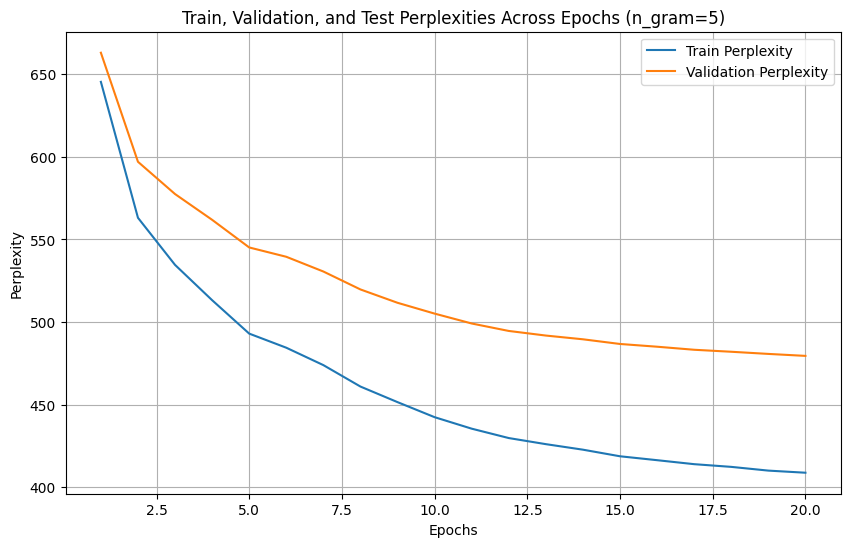

<ipython-input-5-de011d131e5d>:179: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f'ffnn_{n_gram}_bestpp.pt', map_location=device)


Train Perplexity: 408.8265
Validation Perplexity: 479.5185
Test Perplexity: 485.3599


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import os
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class FFNNLanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=512, hidden_dims=[256, 256, 256], n_gram=5, dropout_rate=0.6):
        super(FFNNLanguageModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * (n_gram - 1), hidden_dims[0])
        self.fc2 = nn.Linear(hidden_dims[0], hidden_dims[1])
        self.fc3 = nn.Linear(hidden_dims[1], hidden_dims[2])
        self.fc4 = nn.Linear(hidden_dims[2], vocab_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        embedded = self.embedding(x).view(x.shape[0], -1)
        hidden = self.relu(self.fc1(embedded))
        hidden = self.dropout(hidden)
        hidden = self.relu(self.fc2(hidden))
        hidden = self.dropout(hidden)
        hidden = self.relu(self.fc3(hidden))
        hidden = self.dropout(hidden)
        output = self.fc4(hidden)
        return output

def train_ffnn(train_sentences, val_sentences, vocab, n_gram, epochs=20, lr=0.0001, batch_size=128, corpus_path="sample.txt"):
    vocab_size = len(vocab)
    word_to_index = {word: i for i, word in enumerate(vocab)}

    train_data = preprocess_data(train_sentences, n_gram)
    val_data = preprocess_data(val_sentences, n_gram)

    model = FFNNLanguageModel(vocab_size, n_gram=n_gram).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-2)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    patience = 2
    best_val_perplexity = float('inf')
    epochs_without_improvement = 0

    # Store perplexities for plotting
    train_perplexities = []
    val_perplexities = []
    test_perplexities = []

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        random.shuffle(train_data)

        for i in range(0, len(train_data), batch_size):
            batch = train_data[i:i + batch_size]
            contexts, targets = zip(*batch)

            contexts = [[word if word in word_to_index else "<UNK>" for word in context] for context in contexts]
            targets = [target if target in word_to_index else "<UNK>" for target in targets]

            context_idxs = torch.tensor([[word_to_index[word] for word in context] for context in contexts], dtype=torch.long).to(device)
            target_idxs = torch.tensor([word_to_index[target] for target in targets], dtype=torch.long).to(device)

            optimizer.zero_grad()
            output = model(context_idxs)
            loss = criterion(output, target_idxs)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Calculate perplexities for this epoch
        train_perplexity = calculate_perplexity(model, train_data, word_to_index, criterion, n_gram, batch_size)
        val_perplexity = calculate_perplexity(model, val_data, word_to_index, criterion, n_gram, batch_size)
        # test_perplexity = calculate_perplexity(model, test_data, word_to_index, criterion, n_gram, batch_size)

        # Append the perplexities for plotting
        train_perplexities.append(train_perplexity)
        val_perplexities.append(val_perplexity)
        # test_perplexities.append(test_perplexity)

        print(f"Epoch {epoch + 1}, Training Perplexity: {train_perplexity:.4f}")
        print(f"Epoch {epoch + 1}, Validation Perplexity: {val_perplexity:.4f}")
        # print(f"Epoch {epoch + 1}, Test Perplexity: {test_perplexity:.4f}")

        if val_perplexity < best_val_perplexity:
            best_val_perplexity = val_perplexity
            epochs_without_improvement = 0
            # Save model with filename 'ffnn_bestpp_{n_gram}.pt'
            torch.save({
                'model_state_dict': model.state_dict(),
                'vocab_size': vocab_size,
                'vocab': vocab
            }, f'2024201073_NNLM_5_pp.pt')
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch + 1} (no improvement for {patience} epochs).")
                break

        scheduler.step()

    # Plotting the Perplexity Graph for Train, Validation, and Test
    epochs_range = range(1, epoch + 2)
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_range, train_perplexities, label='Train Perplexity')
    plt.plot(epochs_range, val_perplexities, label='Validation Perplexity')
    # plt.plot(epochs_range, test_perplexities, label='Test Perplexity')
    plt.xlabel('Epochs')
    plt.ylabel('Perplexity')
    plt.title(f'Train, Validation, and Test Perplexities Across Epochs (n_gram={n_gram})')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

def preprocess_data(tokenized_sentences, n_gram):
    data = []
    for sentence in tokenized_sentences:
        for i in range(len(sentence) - (n_gram - 1)):
            context = sentence[i:i + (n_gram - 1)]
            target = sentence[i + (n_gram - 1)]
            data.append((context, target))
    return data

def calculate_perplexity(model, data, word_to_index, criterion, n_gram, batch_size=64):
    model.eval()
    total_loss = 0
    total_words = 0

    with torch.no_grad():
        for i in range(0, len(data), batch_size):
            batch = data[i:i + batch_size]
            contexts, targets = zip(*batch)

            contexts = [[word if word in word_to_index else "<UNK>" for word in context] for context in contexts]
            targets = [target if target in word_to_index else "<UNK>" for target in targets]

            context_idxs = torch.tensor([[word_to_index[word] for word in context] for context in contexts], dtype=torch.long).to(device)
            target_idxs = torch.tensor([word_to_index[target] for target in targets], dtype=torch.long).to(device)

            output = model(context_idxs)
            loss = criterion(output, target_idxs)
            total_loss += loss.item() * len(contexts)
            total_words += len(contexts)

    avg_loss = total_loss / total_words
    perplexity = torch.exp(torch.tensor(avg_loss)).item()
    return perplexity

def open_file(corpus_path):
    with open(corpus_path, "r", encoding="utf-8") as f:
        text = f.read()
    return text

if __name__ == "__main__":
    corpus = ["/content/Pride and Prejudice - Jane Austen.txt"]
    n_gram = 5  # Dynamically set n_gram here

    for corpus_path in corpus:
        text = open_file(corpus_path)

        train_tokenized_sentences, val_tokenized_sentences, test_tokenized_sentences = tokenize_text(text, 1000, 2000, True)
        vocab = ["<UNK>"] + sorted(set(word for sentence in train_tokenized_sentences for word in sentence))
        word_to_index = {word: i for i, word in enumerate(vocab)}

        train_data = preprocess_data(train_tokenized_sentences, n_gram)
        val_data = preprocess_data(val_tokenized_sentences, n_gram)
        test_data = preprocess_data(test_tokenized_sentences, n_gram)

        model = train_ffnn(train_tokenized_sentences, val_tokenized_sentences, vocab, n_gram=n_gram, corpus_path=corpus_path)

        # Load the model with the updated filename 'ffnn_bestpp_{n_gram}.pt'
        checkpoint = torch.load(f'2024201073_NNLM_5_pp.pt', map_location=device)
        model = FFNNLanguageModel(checkpoint['vocab_size'], n_gram=n_gram).to(device)
        model.load_state_dict(checkpoint['model_state_dict'])
        model.eval()

        criterion = nn.CrossEntropyLoss()

        train_perplexity = calculate_perplexity(model, train_data, word_to_index, criterion, n_gram)
        val_perplexity = calculate_perplexity(model, val_data, word_to_index, criterion, n_gram)
        test_perplexity = calculate_perplexity(model, test_data, word_to_index, criterion, n_gram)

        print(f"Train Perplexity: {train_perplexity:.4f}")
        print(f"Validation Perplexity: {val_perplexity:.4f}")
        print(f"Test Perplexity: {test_perplexity:.4f}")
